## SpotifyFeatures.csv

#Project 4
#DataSet
https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("datasets/SpotifyFeatures.csv")


Introduction: 
From the dataset we have found that there are 17 features in this file. Looking a the results above there are genre, artist_name, track_name, track_id, popularity, acousticness, daceability, and so on. 

Questions to Answer:
How can clustering algorithms help group songs with similar audio features like tempo, energy, and danceability?
Are the clusters aligned with predefined genres, or do they reveal unexpected groupings?
How can these insights improve music recommendation systems and user experiences?

Project Objective:
This project seeks to use clustering to:

Explore relationships between song features and their groupings.
Identify patterns in music that may be overlooked when focusing on individual songs.
Provide actionable insights for music recommendation systems or playlist curation.
The clustering approach will help answer these questions by using audio features to create meaningful groupings and analyze their relationship to genres, popularity, or mood.

Data Understanding/Visualization
Use methods to try to further understand and visualize the data. Make sure to remember your initial problems/questions when completing this step.
While exploring, does anything else stand out to you (perhaps any surprising insights?)

**How does this step relate to your modeling?**

In [9]:
df.head(), df.info(),df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

(   genre        artist_name                        track_name  \
 0  Movie     Henri Salvador       C'est beau de faire un Show   
 1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
 2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
 3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
 4  Movie       Fabien Nataf                         Ouverture   
 
                  track_id  popularity  acousticness  danceability  \
 0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
 1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
 2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
 3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
 4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   
 
    duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
 0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
 1       137373   0.737     

After analyzing the data we have concluded with have a big enough set to extract 10% in the effort of expediting the process. 

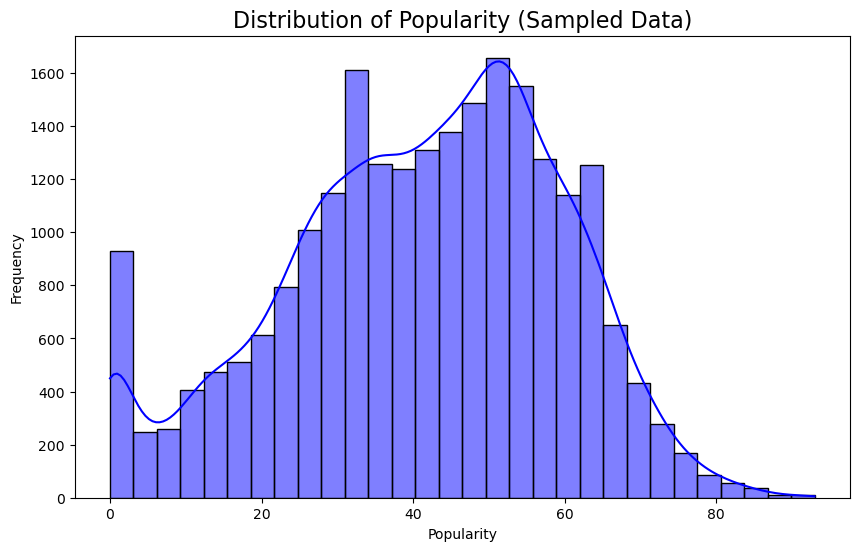

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("datasets/SpotifyFeatures.csv")

df_sample = df.sample(frac=0.1, random_state=42)  # Take 10% 
plt.figure(figsize=(10, 6))
sns.histplot(df_sample['popularity'], kde=True, bins=30, color='blue')
plt.title("Distribution of Popularity (Sampled Data)", fontsize=16)
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

The histogram describes the frequency of popularity distribution in the 10% dataset 

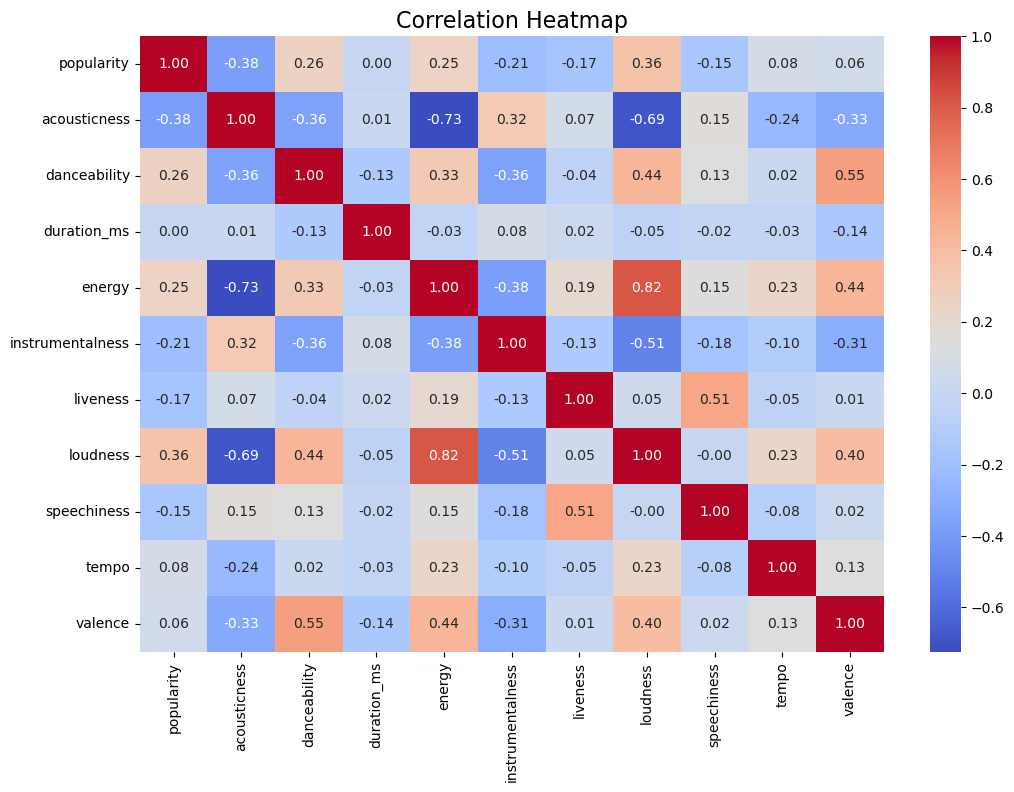

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_features].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


Popularity Correlations:
Positively correlated with danceability (0.26) and loudness (0.36). This suggests that tracks with higher danceability and loudness are more likely to be popular.
Negatively correlated with acousticness (-0.38) and instrumentalness (-0.21), indicating that popular tracks are less likely to be acoustic or instrumental.
Energy and Loudness:
Energy and loudness have a very strong positive correlation (0.82). This indicates that louder songs tend to have higher energy.
Danceability and Valence:
Danceability shows a moderate positive correlation with valence (0.55), suggesting that more danceable songs are often perceived as more positive or happy.
Acousticness and Energy:
Acousticness is strongly negatively correlated with energy (-0.73), meaning that more acoustic songs are less energetic.
Instrumentalness and Loudness:
Instrumentalness is negatively correlated with loudness (-0.51), showing that instrumental tracks are generally quieter.
*****************************************************************************************
Features like loudness, danceability, and valence might be useful predictors for popularity based on their correlations.

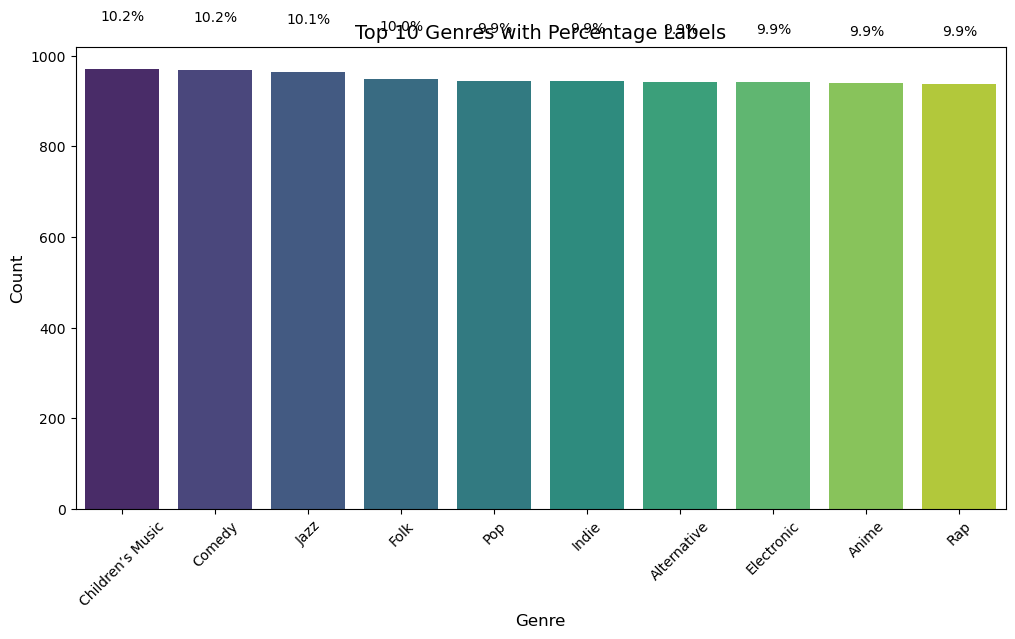

In [25]:
genre_counts = df_sample['genre'].value_counts().head(10) 

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis", hue=genre_counts.index, dodge=False, legend=False)

total_count = genre_counts.values.sum()
for i, count in enumerate(genre_counts.values):
    percentage = f"{(count / total_count * 100):.1f}%"
    ax.text(i, count + 100, percentage, ha="center", va="bottom", fontsize=10)

plt.title("Top 10 Genres with Percentage Labels", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()


From observation children's music, comedy, jazz, folk make the most count

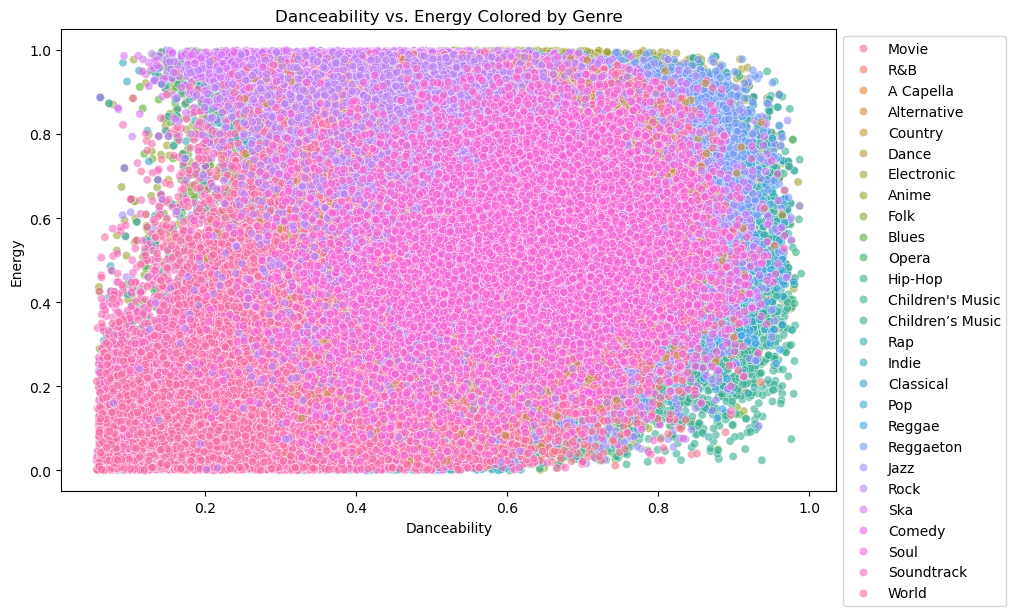

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='energy', hue='genre', data=df, alpha=0.6)
plt.title("Danceability vs. Energy Colored by Genre")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Danceability vs. Energy by Genre:

Observation: Some genres like Electronic or Dance might cluster towards higher energy and danceability values, whereas others might spread across a wider range.

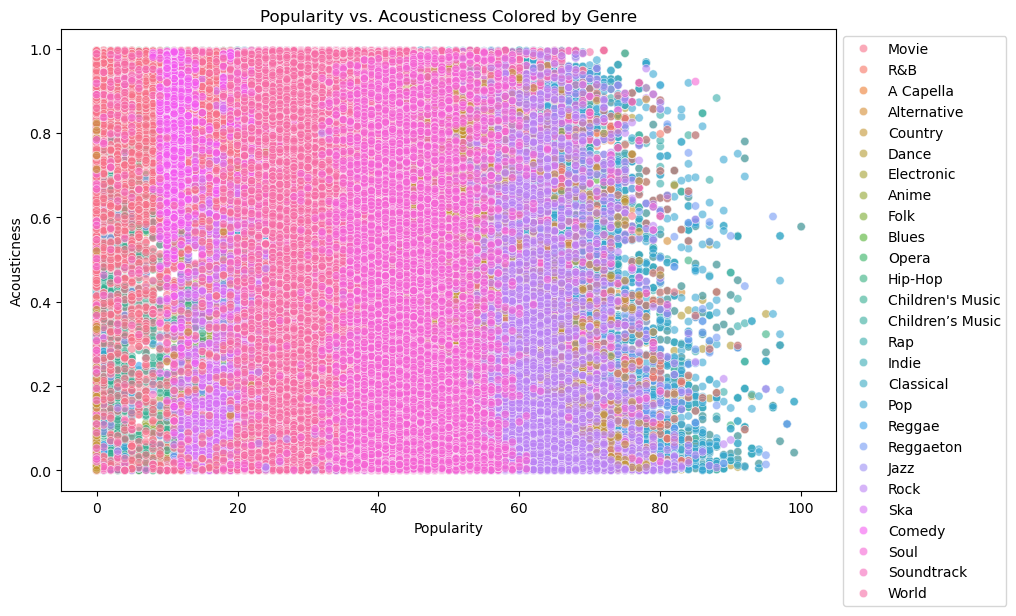

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='acousticness', hue='genre', data=df, alpha=0.6)
plt.title("Popularity vs. Acousticness Colored by Genre")
plt.xlabel("Popularity")
plt.ylabel("Acousticness")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Observation: Popular songs seem to have varying acousticness levels, indicating no immediate dominant trend. However, clustering within specific genres might reveal further insights.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
df = pd.read_csv("datasets/SpotifyFeatures.csv")

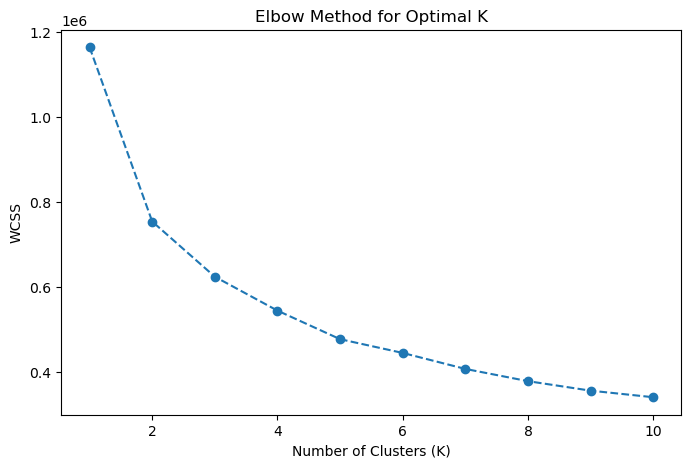

In [2]:
features = ['danceability', 'energy', 'valence', 'acousticness', 'tempo']
df = df.dropna(subset=features)
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


In [3]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters


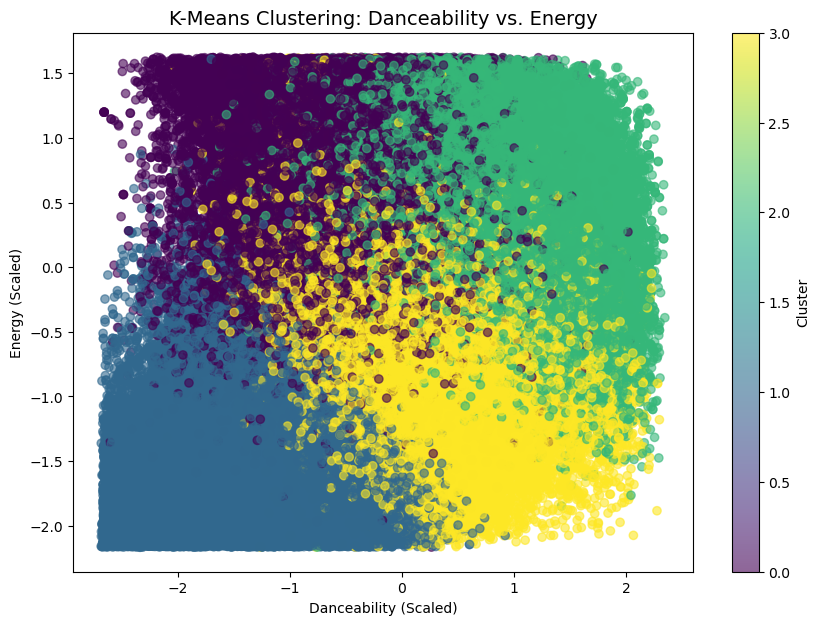

In [4]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('K-Means Clustering: Danceability vs. Energy', fontsize=14)
plt.xlabel('Danceability (Scaled)')
plt.ylabel('Energy (Scaled)')
plt.show()


Danceability: 0.596 (moderate to high)
Energy: 0.459 (moderate)
Valence: 0.419 (neutral to slightly positive)
Acousticness: 0.619 (high, acoustic-influenced)
Tempo: 105.73 BPM (moderate tempo)

Likely represents moderately upbeat acoustic tracks, such as indie or soft rock.
Could include genres blending acoustic and electronic elements.

Cluster 0: High-energy, fast-paced tracks (likely electronic or dance music).
Cluster 1: Calm, acoustic, and melancholic tracks.
Cluster 2: Happy, danceable, and upbeat tracks (modern production).
Cluster 3: Acoustic-focused tracks with moderate energy and positivity.

In [5]:
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)

         danceability    energy   valence  acousticness       tempo
Cluster                                                            
0            0.498385  0.744564  0.406859      0.112707  145.663230
1            0.293449  0.173814  0.150378      0.862219  103.583287
2            0.699384  0.707620  0.670903      0.151454  110.545838
3            0.596192  0.459351  0.418822      0.618696  105.734326


In [16]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score for K={optimal_k}: {silhouette_avg}")

Silhouette Score for K=4: 0.2264916460959231
